Milestone 2

Nama  : Lusitania Ragil Cahyaningsih
Batch : CODA-RMT-001

Program ini dibuat untuk membantu client dalam melakukan standarisasi gaji Data Scientist di perusahaannya, serta mempersiapkan perusahaan dalam persaingan pasar tenaga kerja. Harapannya melalui hasil analisis ini, mampu mempertahankan kualitas dan menjaring karyawan bertalenta baik dengan gaji yang kompetitif.   

A. Identifikasi Masalah

A.1 Topik Permasalahan
- Posisi Data scientist dalam suatu perusahaan/organisasi bisa dibilang cukup penting, pasalnya seorang Data Scientist dapat membantu pengambilan keputusan yang strategis berdasarkan data yang telah ia analisis. Ketidakpuasan terhadap salary yang didapatkan, merupakan salah satu penyebab tingginya tingkat turnover karyawan saat ini. Akibatnya, perusahaan tidak mampu mempertahankan maupun merekrut talenta berkualitas sehingga kesulitan dalam meningkatkan daya saing perusahaan.      


A.2 Problem Statement
- Standarisasi gaji data scientist dan mempersiapkan perusahaan dalam persaingan pasar tenaga kerja

A.3 Latar Belakang
- Di era digital dan teknologi saat ini, profesi Data Scientist semakin berkembang pesat dan menjadi salah satu pekerjaan yang paling dicari di berbagai industri. Data scientist bertugas untuk mengolah, menganalisis, dan menginterpretasi data besar untuk menghasilkan wawasan yang dapat membantu pengambilan keputusan strategis dalam suatu organisasi. Dengan semakin pentingnya peran ini, penting juga untuk memahami berbagai faktor yang mempengaruhi gaji seorang data scientist. Menganalisis data gaji seorang data scientist bukan hanya penting bagi individu yang bekerja di bidang ini, tetapi juga bagi perusahaan dan lembaga yang ingin menarik dan mempertahankan talenta terbaiknya.

A.4 Penjabaran Masalah dengan Metode 5W+1H
- A.2.1 Berapa rata-rata gaji Data Scientist, Data Engineer, dan Data Analyst?
- A.2.2 Bagaimana tren gaji Data Scientist, Data Engineer, dan Data Analyst dari tahun 2020 - 2023?
- A.2.3 Di negara mana gaji tertinggi Data Scientist, Data Engineer, dan Data Analyst?
- A.2.4 Kapan gaji Data Scientist, Data Engineer, dan Data Analyst berada pada posisi terendah dan tertinggi?
- A.2.5 Dari ketiga posisi yang ada (Data Scientist, Data Engineer, dan Data Analyst), posisi mana yang memiliki tren gaji yang baik?
- A.2.6 Apa yang mempengaruhi tinggi - rendahnya gaji Data Scientist, Data Engineer, dan Data Analyst?

B. Data Loading
source: https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023/data

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Read the dataset from CSV
df = pd.read_csv('Latest_Data_Science_Salaries.csv')

# Display the first few rows
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


C. Data Cleaning

In [58]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [59]:
df.describe()

,Salary,Salary in USD,Year
count,3.300000e+03,3300.000000,3300.000000
mean,2.046623e+05,142095.983939,2022.495455
std,7.279383e+05,69028.235512,0.716355
min,1.400000e+04,15000.000000,2020.000000
25%,9.416900e+04,90000.000000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [60]:
# filter data (hanya digunakan data dengan jumlah job title 3 terbanyak - Data Scientist, Data Engineer, dan Data Analyst)

job_title = ['Data Engineer', 'Data Scientist', 'Data Analyst']

df2 = df.loc[df['Job Title'].isin(job_title)]
df2

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3288,Data Engineer,Full-Time,Mid,Intermediate,130800,United States Dollar,United States,130800,Spain,Medium,2020
3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


In [61]:
# drop kolom tidak digunakan (Salary, Salary Currency)
df3 = df2.drop(columns=['Salary','Salary Currency'])
df3

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...
3288,Data Engineer,Full-Time,Mid,Intermediate,United States,130800,Spain,Medium,2020
3291,Data Scientist,Full-Time,Mid,Intermediate,Israel,119059,Singapore,Medium,2021
3293,Data Engineer,Full-Time,Mid,Intermediate,Malta,28369,Malta,Large,2021
3295,Data Scientist,Full-Time,Senior,Expert,United States,412000,United States,Large,2020


D. Analisis dan Perhitungan

D.1 Statistics Descriptive
- Statistik deskriptif adalah cabang statistik yang berfokus pada merangkum dan mendeskripsikan ciri-ciri utama suatu dataset. Ini melibatkan penggunaan berbagai ukuran dan teknik statistik untuk memberikan ringkasan data yang ringkas dan bermakna.
Statistik deskriptif bertujuan untuk memberikan informasi tentang kecenderungan sentral (central tendency), variabilitas (variability), dan sebaran data (distribution).

In [62]:
# D.1.1 Central Tendency
#rata-rata salary
mean = df3['Salary in USD'].mean()
print(f"Rata-rata gaji Data Scientist, Data Engineer, Data Analyst: $ {mean:.2f}")
# nilai tengah salary
median = df3['Salary in USD'].median()
print(f"Nilai tengah gaji Data Scientist, Data Engineer, Data Analyst: $ {median:.2f}")
# modus salary
mode = df3['Salary in USD'].mode().values[0]
print(f"Nilai gaji Data Scientist, Data Engineer, Data Analyst yang paling sering muncul: $ {mode:.2f}")

Rata-rata gaji Data Scientist, Data Engineer, Data Analyst: $ 133667.13
Nilai tengah gaji Data Scientist, Data Engineer, Data Analyst: $ 127037.50
Nilai gaji Data Scientist, Data Engineer, Data Analyst yang paling sering muncul: $ 100000.00


In [63]:
# job title yang sering muncul
print(df3['Job Title'].mode())


0    Data Engineer
Name: Job Title, dtype: object


In [64]:
# jumlah data per job title
df3['Job Title'].value_counts()

Job Title
Data Engineer     702
Data Scientist    635
Data Analyst      459
Name: count, dtype: int64

In [65]:
# D.1.2 Variability
# range
range = df3['Salary in USD'].max() - df3['Salary in USD'].min()
print(f'Rentang gaji Data Scientist, Data Engineer, Data Analyst: $ {range:.2f}')


Rentang gaji Data Scientist, Data Engineer, Data Analyst: $ 415967.00


In [71]:
# quartile
q1 = df3['Salary in USD'].quantile(0.25)
q2 = df3['Salary in USD'].quantile(0.5)
q3 = df3['Salary in USD'].quantile(0.75)

iqr = q3 - q1

print(f'Q1: $ {q1:.2f}')
print(f'Q2: $ {q2:.2f}')
print(f'Q3: $ {q3:.2f}')
print(f'Interquartile Range (IQR): $ {iqr:.2f}')

Q1: $ 85000.00
Q2: $ 127037.50
Q3: $ 174575.00
Interquartile Range (IQR): $ 89575.00


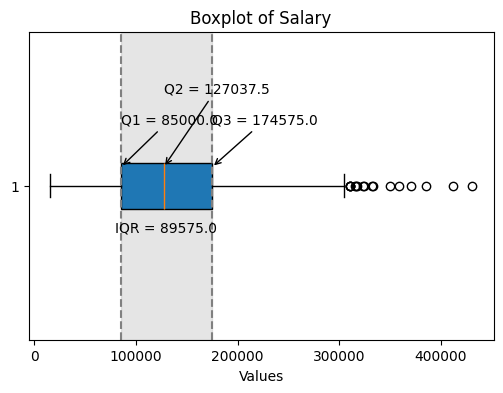

In [72]:
# quartile boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df3['Salary in USD'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Salary')

plt.show()

In [76]:
# variance
variance = df3['Salary in USD'].var()
print('Variasi data gaji Data Scientist, Data Engineer, Data Analyst:', variance)

Variasi data gaji Data Scientist, Data Engineer, Data Analyst: 4011776939.222424


In [82]:
# standard deviation
std = df3['Salary in USD'].std()
print('Standard deviasi data gaji Data Scientist, Data Engineer, Data Analyst:',std)

print(f'\nDari hasil varians diketahui bahwa dari sekelompok orang yang berprofesi sebagai \nData Scientist, Data Engineer dan Data Analyst, memiliki nilai gaji yang sangat beragam \ndan berdasarkan simpangan baku diketahui bahwa variasinya sendiri cukup menyebar \nkarena rata-rata gaji adalah $ {mean:.2f}.')


Standard deviasi data gaji Data Scientist, Data Engineer, Data Analyst: 63338.58965293136

Dari hasil varians diketahui bahwa dari sekelompok orang yang berprofesi sebagai 
Data Scientist, Data Engineer dan Data Analyst, memiliki nilai gaji yang sangat beragam 
dan berdasarkan simpangan baku diketahui bahwa variasinya sendiri cukup menyebar 
karena rata-rata gaji adalah $ 133667.13.


In [ ]:
# D.1.3 Distribution
# discrete distribution

In [ ]:
# continuous distribution

In [ ]:
# Normaly Test - Skewness

In [ ]:
# Normaly Test - Kurtosis

In [ ]:
# D.1.4 Outliers & Extrim Value Analysis

In [ ]:
# D.1.5 Corelation Analysis

D.2 Inferential Statistics
- Statistika inferensial adalah cabang ilmu statistika yang berhubungan dengan pembuatan kesimpulan atau penarikan kesimpulan tentang suatu populasi berdasarkan sampel data. Ini melibatkan penggunaan data sampel untuk membuat generalisasi atau prediksi tentang populasi yang lebih besar dari mana sampel diambil.